In [347]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = None


In [348]:
taxifares_train = pd.read_csv('train.csv', nrows=1500000)
taxifares_test = pd.read_csv('test.csv')

fares_train = taxifares_train.copy()
fares_test = taxifares_test.copy()

In [349]:
fares_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [350]:
fares_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 8 columns):
key                  1500000 non-null object
fare_amount          1500000 non-null float64
pickup_datetime      1500000 non-null object
pickup_longitude     1500000 non-null float64
pickup_latitude      1500000 non-null float64
dropoff_longitude    1499988 non-null float64
dropoff_latitude     1499988 non-null float64
passenger_count      1500000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 91.6+ MB


- There is some few missing data in the dropoff features. Considering our sample size, we can remove them from the dataset.

In [351]:
fares_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [352]:
fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.500000e+06,1.500000e+06,1.500000e+06,1.499988e+06,1.499988e+06,1.500000e+06
mean,1.134985e+01,-7.252937e+01,3.993002e+01,-7.252894e+01,3.992976e+01,1.684121e+00
std,9.879051e+00,1.266523e+01,8.063783e+00,1.223703e+01,1.000074e+01,1.318075e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399140e+01,4.073401e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075265e+01,-7.398015e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396712e+01,4.076711e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,2.522271e+03,2.621628e+03,2.842474e+03,3.345917e+03,2.080000e+02


- some strange values here:                
    (1) the max passenger_count is 208 - most likely to be a wrong outlier              
    (2) the min passenger_count is 0 - maybe another outlier?              
    (3) New York latitude goes from 40.917577 (North Latitude) to 40.477399 (South Latitude) and its longitude goes from -73.700272 (East Longitude) to -74.259090 (West Longitude) - So there are some more outliers.                
    (4) There is at least one negative value in fare_amount - more outlier(s)             

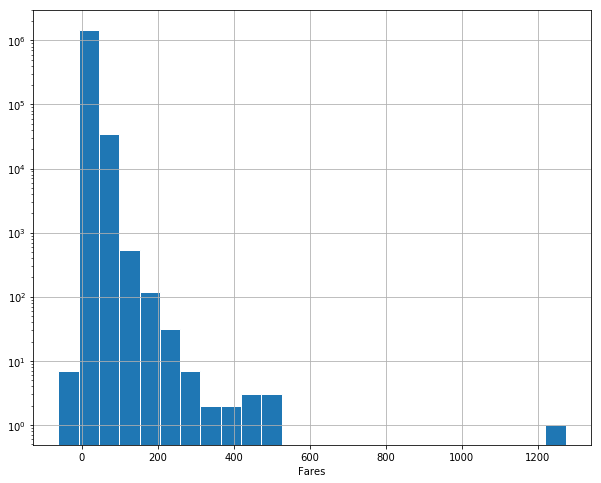

In [353]:
_ = fares_train['fare_amount'].hist(bins=25, figsize=(10,8), edgecolor='w', log=True )
plt.xlabel('Fares')
plt.show()

## Dropping outliers

+ ##### Dropping negative values in fare_amount

In [354]:
fares_train[fares_train['fare_amount'] < 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 2039 to 1484989
Data columns (total 8 columns):
key                  115 non-null object
fare_amount          115 non-null float64
pickup_datetime      115 non-null object
pickup_longitude     115 non-null float64
pickup_latitude      115 non-null float64
dropoff_longitude    115 non-null float64
dropoff_latitude     115 non-null float64
passenger_count      115 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 8.1+ KB


In [355]:
fares_train = fares_train[~(fares_train['fare_amount'] < 1)]

+ ##### Dropping unreal passenger_count

In [356]:
fares_train[(fares_train['passenger_count'] > 10) | (fares_train['passenger_count'] == 0)].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5370.000000,5370.000000,5370.000000,5358.000000,5358.000000,5370.000000
mean,8.848849,-72.751193,40.077309,-72.636606,40.015361,0.038734
std,6.329115,9.445388,5.203334,9.863932,5.434076,2.838417
min,2.500000,-74.031985,0.000000,-74.182600,0.000000,0.000000
25%,5.300000,-73.991907,40.736965,-73.991600,40.735101,0.000000
50%,7.300000,-73.981800,40.754400,-73.980200,40.753664,0.000000
75%,10.500000,-73.967533,40.768000,-73.964800,40.768631,0.000000
max,90.000000,0.000000,41.366138,0.000000,41.366138,208.000000


In [357]:
fares_train = fares_train[~((fares_train['passenger_count'] > 10) | (fares_train['passenger_count'] == 0))]

+ ##### Dropping latitude and longitude outliers
It seems that there are some data for taxi rides outside New York city in both training and testset (with both pickup and dropoff outside the city limits). It is not possible to drop all these values (as we need to predict their fares in the testset in order to score in the competition), so only the outliers that are more than 1 degree of latitude (111 km) or longitude(85km), from the city limits will be removed.

In [358]:
fares_train[(fares_train['pickup_latitude'] > 41.917577) | (fares_train['pickup_latitude'] < 39.477399)].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,28944.000000,28944.000000,28944.000000,28944.000000,28944.000000,28944.000000
mean,12.007577,0.579034,-1.658932,-2.546040,0.121737,1.676133
std,14.567435,49.852640,40.009787,47.100138,51.091643,1.305072
min,1.600000,-3377.680935,-3458.664702,-3383.296608,-3461.540872,1.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.500000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1273.310000,2522.271325,2621.628430,2842.474030,3345.917353,6.000000


In [359]:
fares_train = fares_train[~((fares_train['pickup_latitude'] > 41.917577) | (fares_train['pickup_latitude'] < 39.477399))]

In [360]:
fares_train[(fares_train['pickup_longitude'] > -72.700272) | (fares_train['pickup_longitude'] < -75.259090)].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,16.189459,-63.043353,40.769004,-65.023822,36.985752,2.085470
std,13.680846,172.187454,0.208586,65.818793,11.778810,1.708329
min,2.500000,-1452.988333,39.521383,-1182.095360,0.000000,1.000000
25%,6.100000,-75.341258,40.721345,-73.993294,40.712118,1.000000
50%,10.500000,-7.516667,40.752285,-73.976190,40.748933,1.000000
75%,22.050000,0.000000,40.770352,-73.942322,40.767165,2.000000
max,69.300000,0.551758,41.841992,0.000000,41.832147,6.000000


In [361]:
fares_train = fares_train[~((fares_train['pickup_longitude'] > -72.700272) | (fares_train['pickup_longitude'] < -75.259090))]

In [362]:
fares_train[((fares_train['dropoff_latitude'] > 41.917577) | (fares_train['dropoff_latitude'] < 39.477399))].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,16.460330,-73.963888,40.745716,-4.012974,0.206126,1.665326
std,21.030761,0.066992,0.051415,16.933376,143.060150,1.375767
min,1.500000,-74.592145,40.301512,-86.804122,-3114.338567,1.000000
25%,4.500000,-73.992480,40.731573,0.000000,0.000000,1.000000
50%,8.500000,-73.980438,40.751349,0.000000,0.000000,1.000000
75%,16.700000,-73.958673,40.765033,0.000000,0.000000,2.000000
max,195.800000,-73.585735,41.800252,45.581619,1903.111567,6.000000


In [363]:
fares_train = fares_train[~((fares_train['dropoff_latitude'] > 41.917577) | (fares_train['dropoff_latitude'] < 39.477399))]

In [364]:
fares_train[((fares_train['dropoff_longitude'] > -72.700272) | (fares_train['dropoff_longitude'] < -75.259090))].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,15.536269,-73.973865,40.730657,-62.152245,40.727665,1.932642
std,36.362729,0.107443,0.170298,194.294874,0.181101,1.620385
min,3.300000,-74.689831,39.608756,-1329.621332,39.613833,1.000000
25%,6.100000,-73.990675,40.742420,-37.233332,40.738292,1.000000
50%,8.500000,-73.978436,40.755732,-1.307267,40.754950,1.000000
75%,15.300000,-73.967183,40.769130,0.000000,40.771927,2.000000
max,495.000000,-72.702870,41.063392,0.000000,41.447459,6.000000


In [365]:
fares_train = fares_train[~((fares_train['dropoff_longitude'] > -72.700272) | (fares_train['dropoff_longitude'] < -75.259090))]

In [366]:
fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.463784e+06,1.463784e+06,1.463784e+06,1.463784e+06,1.463784e+06,1.463784e+06
mean,1.134114e+01,-7.397516e+01,4.075091e+01,-7.397429e+01,4.075124e+01,1.690216e+00
std,9.746216e+00,3.928834e-02,3.208232e-02,3.834258e-02,3.515865e-02,1.305492e+00
min,2.000000e+00,-7.523599e+01,3.953896e+01,-7.525050e+01,3.953333e+01,1.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073653e+01,-7.399159e+01,4.073551e+01,1.000000e+00
50%,8.500000e+00,-7.398209e+01,4.075335e+01,-7.398060e+01,4.075384e+01,1.000000e+00
75%,1.250000e+01,-7.396832e+01,4.076753e+01,-7.396534e+01,4.076839e+01,2.000000e+00
max,5.000000e+02,-7.275927e+01,4.169685e+01,-7.271667e+01,4.171463e+01,9.000000e+00


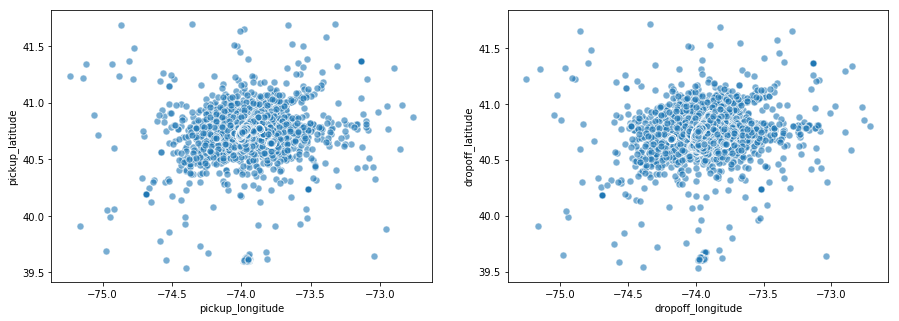

In [367]:
fig, (ax1, ax2) = plt.subplots(1, 2)
_ = fares_train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', edgecolor='w', alpha=0.6, s=50, 
                     ax=ax1, figsize=(15,5))
_ = fares_train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', edgecolor='w', alpha=0.6, s=50, 
                     ax=ax2, figsize=(15,5))
plt.show()

+ ##### Dropping fares amount equal to zero

In [368]:
fares_train = fares_train[~(fares_train['fare_amount'] <= 0)]

In [369]:
fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.463784e+06,1.463784e+06,1.463784e+06,1.463784e+06,1.463784e+06,1.463784e+06
mean,1.134114e+01,-7.397516e+01,4.075091e+01,-7.397429e+01,4.075124e+01,1.690216e+00
std,9.746216e+00,3.928834e-02,3.208232e-02,3.834258e-02,3.515865e-02,1.305492e+00
min,2.000000e+00,-7.523599e+01,3.953896e+01,-7.525050e+01,3.953333e+01,1.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073653e+01,-7.399159e+01,4.073551e+01,1.000000e+00
50%,8.500000e+00,-7.398209e+01,4.075335e+01,-7.398060e+01,4.075384e+01,1.000000e+00
75%,1.250000e+01,-7.396832e+01,4.076753e+01,-7.396534e+01,4.076839e+01,2.000000e+00
max,5.000000e+02,-7.275927e+01,4.169685e+01,-7.271667e+01,4.171463e+01,9.000000e+00


## Feature Selection and Engineering

+ ##### Distance between pickup and dropoff
1 degree of latitude is approximately 111 km        
1 degree of longitude at latitude 40° is approximately 85 km

In [370]:
for df_set in (fares_train, fares_test):
    df_set['dist_long (km)'] = abs(df_set['pickup_longitude'] - df_set['dropoff_longitude']) * 85

In [371]:
for df_set in (fares_train, fares_test):
    df_set['dist_lat (km)'] = abs(df_set['pickup_latitude'] - df_set['dropoff_latitude']) * 111

In [372]:
for df_set in (fares_train, fares_test):
    df_set['ride_distance_km'] = df_set['dist_long (km)'] + df_set['dist_lat (km)']
    
fares_train = fares_train.drop(['dist_lat (km)'], axis=1)
fares_train = fares_train.drop(['dist_long (km)'], axis=1)
fares_test = fares_test.drop(['dist_lat (km)'], axis=1)
fares_test = fares_test.drop(['dist_long (km)'], axis=1)

In [373]:
fares_train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,ride_distance_km
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.233136
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,10.974111
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.911428
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,3.146484
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2.721094
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,5.339053
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,1.989980
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,5.860565
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,1.683205
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,3.618385


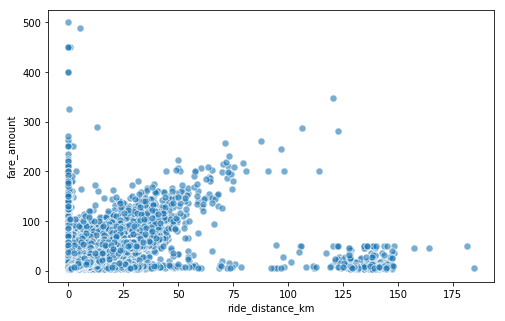

In [374]:
_ = fares_train.plot(kind='scatter', x='ride_distance_km', y='fare_amount', edgecolor='w', alpha=0.6, s=50, figsize=(8,5))

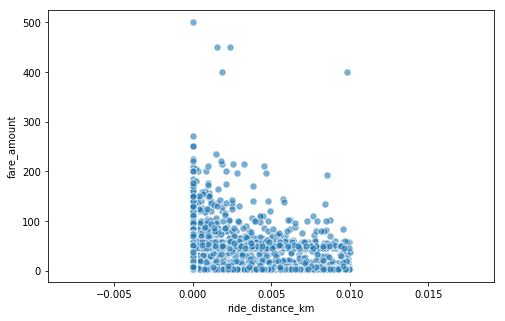

In [375]:
subset_fares = fares_train[fares_train['ride_distance_km'] < 0.01]
_ = subset_fares.plot(kind='scatter', x='ride_distance_km', y='fare_amount', edgecolor='w', alpha=0.6, s=50, figsize=(8,5))

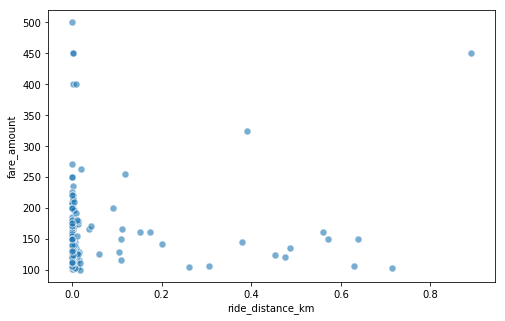

In [376]:
subset_fares = fares_train[(fares_train['ride_distance_km'] < 1) & (fares_train['fare_amount'] > 100)]
_ = subset_fares.plot(kind='scatter', x='ride_distance_km', y='fare_amount', edgecolor='w', alpha=0.6, s=50, figsize=(8,5))

Some ride fares are quite high even so the travel distance is shorter than 1km (most of than even shorter than 200 meters). They are probably outliers.
All rides with travel distance smaller than 10 meters are also being considered outliers.

In [377]:
fares_train = fares_train[~(fares_train['ride_distance_km'] < 0.01)]
fares_train = fares_train[~((fares_train['ride_distance_km'] < 1) & (fares_train['fare_amount'] > 100))]

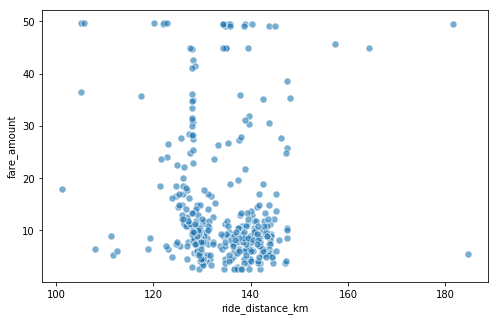

In [378]:
subset_fares = fares_train[(fares_train['ride_distance_km'] > 100) & (fares_train['fare_amount'] < 50)]
_ = subset_fares.plot(kind='scatter', x='ride_distance_km', y='fare_amount', edgecolor='w', alpha=0.6, s=50, figsize=(8,5))

Let's assume that travel distances higher than 100 km with fare amount lower than US$ 50 are also outliers.

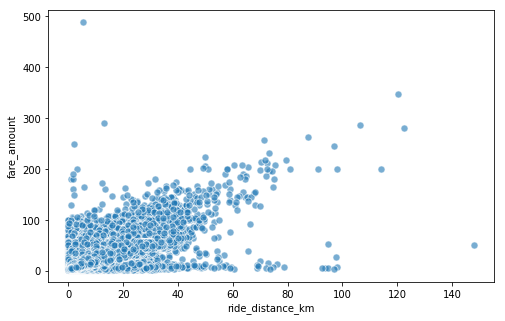

In [379]:
fares_train = fares_train[~((fares_train['ride_distance_km'] > 100) & (fares_train['fare_amount'] < 50))]
_ = fares_train.plot(kind='scatter', x='ride_distance_km', y='fare_amount', edgecolor='w', alpha=0.6, s=50, figsize=(8,5))

+ ##### Pickupdatetime from object to datetime

In [380]:
fares_train['pickup_datetime']  = pd.to_datetime(fares_train['pickup_datetime'])
fares_test['pickup_datetime']  = pd.to_datetime(fares_test['pickup_datetime'])
fares_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444401 entries, 0 to 1499999
Data columns (total 9 columns):
key                  1444401 non-null object
fare_amount          1444401 non-null float64
pickup_datetime      1444401 non-null datetime64[ns]
pickup_longitude     1444401 non-null float64
pickup_latitude      1444401 non-null float64
dropoff_longitude    1444401 non-null float64
dropoff_latitude     1444401 non-null float64
passenger_count      1444401 non-null int64
ride_distance_km     1444401 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 110.2+ MB


In [381]:
for df in (fares_train, fares_test):
    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
    df['hour'] = df['pickup_datetime'].dt.hour
    df['minute'] = df['pickup_datetime'].dt.minute

fares_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,ride_distance_km,year,month,day,dayofweek,hour,minute
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.233136,2009,6,15,0,17,26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,10.974111,2010,1,5,1,16,52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.911428,2011,8,18,3,0,35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,3.146484,2012,4,21,5,4,30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2.721094,2010,3,9,1,7,51


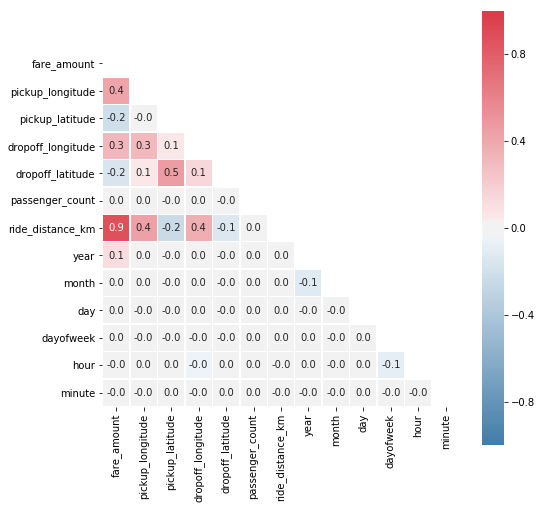

In [382]:
corr = fares_train.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.1f', cmap=cmap, vmin=-1, center=0, linewidths=.5)
plt.show()

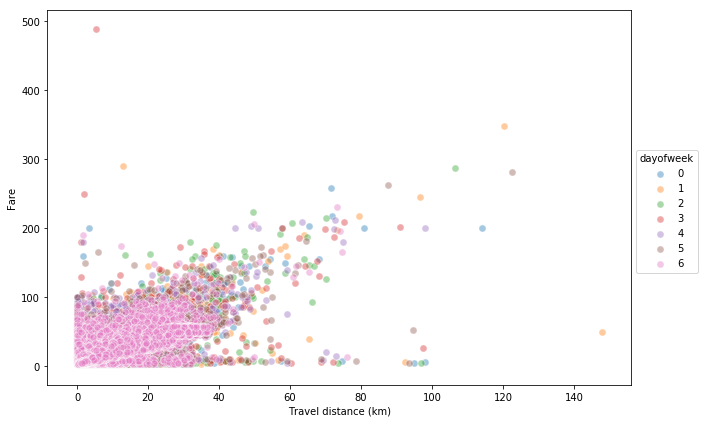

In [384]:
g = sns.FacetGrid(fares_train, size=6, aspect=1.5, hue='dayofweek', despine=False)
g.map(plt.scatter,'ride_distance_km', 'fare_amount', edgecolor='w', s=50, alpha=0.4)
g.add_legend()
plt.xlabel('Travel distance (km)')
plt.ylabel('Fare')
plt.show()

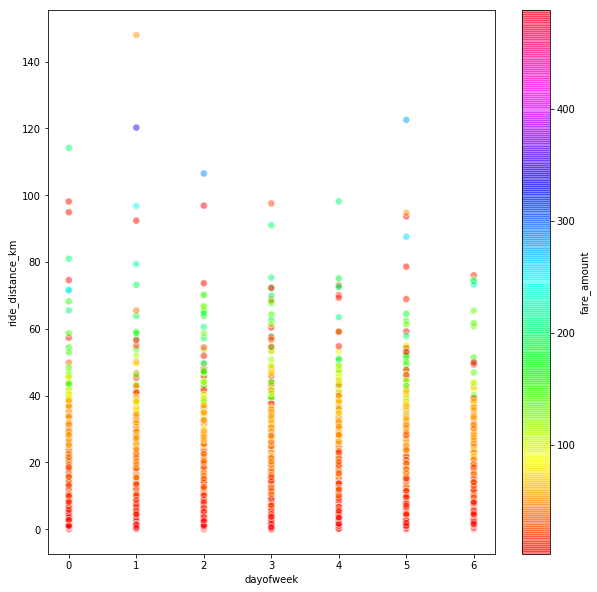

In [386]:
_ = fares_train.plot(kind='scatter', x='dayofweek', y='ride_distance_km', alpha=0.5, s=50, c="fare_amount", 
                  cmap=plt.get_cmap("hsv"), edgecolor='w', colorbar=True, figsize=(10,10), sharex=False)

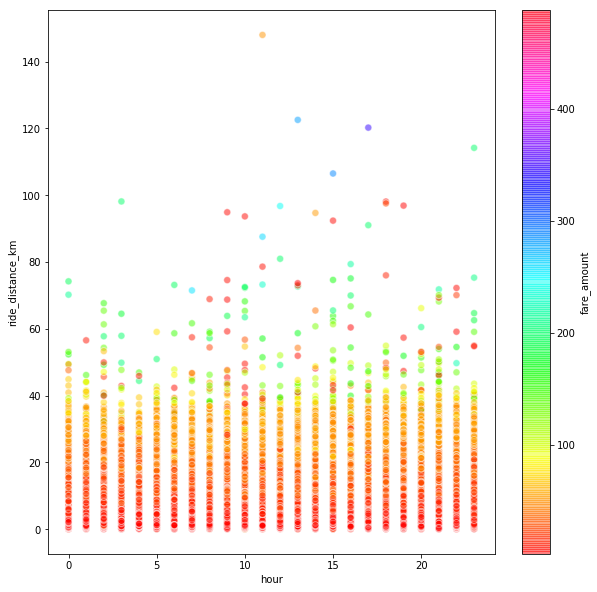

In [389]:
_ = fares_train.plot(kind='scatter', x='hour', y='ride_distance_km', alpha=0.5, s=50, c="fare_amount", 
                  cmap=plt.get_cmap("hsv"), edgecolor='w', colorbar=True, figsize=(10,10), sharex=False)

In [390]:
fares_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444401 entries, 0 to 1499999
Data columns (total 15 columns):
key                  1444401 non-null object
fare_amount          1444401 non-null float64
pickup_datetime      1444401 non-null datetime64[ns]
pickup_longitude     1444401 non-null float64
pickup_latitude      1444401 non-null float64
dropoff_longitude    1444401 non-null float64
dropoff_latitude     1444401 non-null float64
passenger_count      1444401 non-null int64
ride_distance_km     1444401 non-null float64
year                 1444401 non-null int64
month                1444401 non-null int64
day                  1444401 non-null int64
dayofweek            1444401 non-null int64
hour                 1444401 non-null int64
minute               1444401 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(7), object(1)
memory usage: 176.3+ MB


In [391]:
fares_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 14 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
ride_distance_km     9914 non-null float64
year                 9914 non-null int64
month                9914 non-null int64
day                  9914 non-null int64
dayofweek            9914 non-null int64
hour                 9914 non-null int64
minute               9914 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(1)
memory usage: 1.1+ MB


## Training model

In [392]:
y_train = fares_train['fare_amount'].copy()
X_train = fares_train.drop(['key', 'fare_amount', 'pickup_datetime'], axis=1)
X_test = fares_test.drop(['key', 'pickup_datetime'], axis=1)
X_train.shape, y_train.shape, X_test.shape

((1444401, 12), (1444401,), (9914, 12))

RMSE scores:  [3.43501944 3.43943694 3.52967596 3.40369805 3.41218599 3.44404603
 3.41004851 3.47082254 3.65083473 3.46067781]
RMSE mean: 3.4656
RMSE std: 0.0709



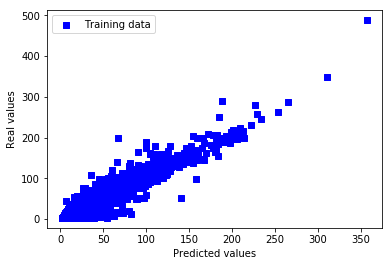

"best_classifier.coef_\nprint(pd.Series(best_classifier.coef_, index=X_train.columns))\n\nfinal_prediction = best_classifier.predict(X_test)\n\nsubmission = pd.DataFrame({'Id': houseprices_test['Id'],\n                           'SalePrice': final_prediction})\n\nsubmission.to_csv('HousePrices_3rd_Submission.csv', index=False)\n\nsubmission.shape"

In [395]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
np.random.seed(87)

randforest = RandomForestRegressor()

scores = cross_val_score(randforest, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
   
print('RMSE scores: ', rmse_scores)
print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))
print()

randforest.fit(X_train, y_train)
y_predicted = randforest.predict(X_train)

plt.scatter(y_predicted, y_train, c = "blue", marker = "s", label = "Training data")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
#plt.plot([0, 600000], [0, 600000], c = "red")
plt.show()


In [396]:
final_prediction = randforest.predict(X_test)

submission = pd.DataFrame({'key': fares_test['key'],
                           'fare_amount': final_prediction})

submission.to_csv('TaxiFare_1st_Submission.csv', index=False)

submission.shape

(9914, 2)